In [1]:
import sys
sys.path.append('../../../src')
from dimer_model_fit import *
from helpers import *
%matplotlib notebook

### Import data

In [2]:
df_main = pd.read_csv('df_main.csv')
df_s1 = pd.read_csv('df_s1.csv')
df_s2 = pd.read_csv('df_s2.csv')

wd_wt = 15.5303089860562 # <- AUC measurement
wd_mut = 15 # <- initial guess

### Analysis with shared wm

In [3]:
analysis1 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis2 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis3 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=True, 
                                            fix_mut=False, fit_D=False)
analysis4 = EnergiesConfidenceIntervalPaired(df_main, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis5 = EnergiesConfidenceIntervalPaired(df_s1, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=False, 
                                            fix_mut=False, fit_D=False)
analysis6 = EnergiesConfidenceIntervalPaired(df_s2, log=True, p0=(wd_wt, wd_mut, 5), fix_wt=False, 
                                            fix_mut=False, fit_D=False)

### Analysis with unshared wm

In [4]:
df_main_wt = df_main[df_main.Line.isin(['lp637', 'nwg201'])]
df_main_mut = df_main[df_main.Line.isin(['nwg338', 'nwg369'])]
df_s1_wt = df_s1[df_s1.Line.isin(['lp637', 'nwg201'])]
df_s1_mut = df_s1[df_s1.Line.isin(['nwg338', 'nwg369'])]
df_s2_wt = df_s2[df_s2.Line.isin(['lp637', 'nwg201'])]
df_s2_mut = df_s2[df_s2.Line.isin(['nwg338', 'nwg369'])]

analysis7 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_wd=True, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]
analysis8 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_wd=True, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]
analysis9 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_wd=True, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]

analysis10 = [EnergiesConfidenceIntervalUnpaired(df_main_wt, log=True, fix_wd=False, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_main_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]
analysis11 = [EnergiesConfidenceIntervalUnpaired(df_s1_wt, log=True, fix_wd=False, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_s1_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]
analysis12 = [EnergiesConfidenceIntervalUnpaired(df_s2_wt, log=True, fix_wd=False, p0=(wd_wt, 5)),
             EnergiesConfidenceIntervalUnpaired(df_s2_mut, log=True, fix_wd=False, p0=(wd_mut, 5))]

### Create table

In [5]:
def create_row(analysis, D, wm_shared):
    
    # Extract data
    if wm_shared:
        fix_wt = analysis.fix_wt
        wd_full_wt = analysis.wd_full[0]
        wd_full_L109R = analysis.wd_full[1]
        wds_wt = analysis.wds[0]
        wds_L109R = analysis.wds[1]
        wm_full_wt = analysis.wm_full
        wm_full_L109R = analysis.wm_full
        wms_wt = analysis.wms
        wms_L109R = analysis.wms
    else:
        fix_wt = analysis[0].fix_wd
        wd_full_wt = analysis[0].wd_full
        wd_full_L109R = analysis[1].wd_full
        wds_wt = analysis[0].wds
        wds_L109R = analysis[1].wds
        wm_full_wt = analysis[0].wm_full
        wm_full_L109R = analysis[1].wm_full
        wms_wt = analysis[0].wms
        wms_L109R = analysis[1].wms
    
    # D
    row = {r'$D$' + ' (nm)': str(D)}
    
    # wd wt fixed?
    if fix_wt:
        row[r'$K_D$' +  ' WT fixed?'] = '✓'
    else:
        row[r'$K_D$' +  ' WT fixed?'] = 'x'
        
    # wm shared
    if wm_shared:
        row[r'$w_m$' +  ' shared?'] = '✓'
    else:
        row[r'$w_m$' +  ' shared?'] = 'x'
        
    # KD wt
    a = 2 / np.exp(wd_full_wt) * 1e9
    [low, high] = np.percentile(2 / np.exp(wds_wt) * 1e9, [2.5, 97.5])
    if not fix_wt:
        row[r'$K_D$' +  ' WT (nM)'] = f'{a:.0f} [{low:.0f}, {high:.0f}]'
    else:
        row[r'$K_D$' +  ' WT (nM)'] = f'{a:.0f}'
        
    # wd wt
    a = wd_full_wt
    [low, high] = np.percentile(wds_wt, [2.5, 97.5])
    if not fix_wt:
        row[r'$w_d$' +  ' WT'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
    else:
        row[r'$w_d$' +  ' WT'] = f'{a:.2f}'
    
    # KD mut
    a = 2 / np.exp(wd_full_L109R) * 1e9
    [low, high] = np.percentile(2 / np.exp(wds_L109R) * 1e9, [2.5, 97.5])
    row[r'$K_D$' +  ' L109R (nM)'] = f'{a:.0f} [{low:.0f}, {high:.0f}]'
     
    # wd mut
    a = wd_full_L109R
    [low, high] = np.percentile(wds_L109R, [2.5, 97.5])
    row[r'$w_d$' +  ' L109R'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'  
    
    # wm wt
    a = wm_full_wt
    [low, high] = np.percentile(wms_wt, [2.5, 97.5])
    row[r'$w_m$' +  ' WT'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
    
    # wm L109R
    a = wm_full_L109R
    [low, high] = np.percentile(wms_L109R, [2.5, 97.5])
    row[r'$w_m$' +  ' L109R'] = f'{a:.2f} [{low:.2f}, {high:.2f}]'
    
    return row

In [6]:
res = pd.DataFrame()
res = res.append(create_row(analysis1, 5, wm_shared=True), ignore_index=True)
res = res.append(create_row(analysis2, 0.5, wm_shared=True), ignore_index=True)
res = res.append(create_row(analysis3, 50, wm_shared=True), ignore_index=True)
res = res.append(create_row(analysis4, 5, wm_shared=True), ignore_index=True)
# res = res.append(create_row(analysis5, 0.5), ignore_index=True)
# res = res.append(create_row(analysis6, 50), ignore_index=True)
res = res.append(create_row(analysis7, 5, wm_shared=False), ignore_index=True)
# res = res.append(create_row(analysis8, 0.5), ignore_index=True)
# res = res.append(create_row(analysis9, 50), ignore_index=True)
res = res.append(create_row(analysis10, 5, wm_shared=False), ignore_index=True)
# res = res.append(create_row(analysis11, 0.5), ignore_index=True)
# res = res.append(create_row(analysis12, 50), ignore_index=True)

In [7]:
res

,$D$ (nm),$K_D$ WT fixed?,$w_m$ shared?,$K_D$ WT (nM),$w_d$ WT,$K_D$ L109R (nM),$w_d$ L109R,$w_m$ WT,$w_m$ L109R
0,5,✓,✓,360,15.53,"2055 [1896, 2259]","13.79 [13.69, 13.87]","5.52 [5.49, 5.54]","5.52 [5.49, 5.54]"
1,0.5,✓,✓,360,15.53,"1712 [1577, 1858]","13.97 [13.89, 14.05]","6.71 [6.69, 6.74]","6.71 [6.69, 6.74]"
2,50,✓,✓,360,15.53,"3934 [3257, 4927]","13.14 [12.91, 13.33]","4.22 [4.19, 4.25]","4.22 [4.19, 4.25]"
3,5,x,✓,"425 [280, 654]","15.36 [14.93, 15.78]","2459 [1536, 4061]","13.61 [13.11, 14.08]","5.59 [5.41, 5.79]","5.59 [5.41, 5.79]"
4,5,✓,x,360,15.53,"4386 [2307, 7058]","13.03 [12.55, 13.67]","5.51 [5.49, 5.54]","5.81 [5.56, 5.99]"
5,5,x,x,"291 [216, 577]","15.74 [15.06, 16.04]","4386 [2117, 7455]","13.03 [12.50, 13.76]","5.42 [5.28, 5.73]","5.81 [5.52, 6.01]"


In [8]:
res.to_csv('parameters.csv')

### Figure

In [9]:
def plot_table(results):
    fig, ax = plt.subplots()
    fontsize = 7
    cell_text = []
    for row in range(len(results)):
        cell_text.append(results.iloc[row])

    widths = np.array([0.08, 0.14, 0.13, 0.2, 0.22, 0.2, 0.22, 0.2, 0.2])
    tab = ax.table(cellText=cell_text, colLabels=results.columns, loc='center', colWidths=widths/sum(widths),
                  cellLoc='left', colLoc='left')
    tab.auto_set_font_size(False)
    cellDict = tab.get_celld()
    for i in range(0,len(results.columns)):
        cellDict[(0,i)].set_height(.2)
#         cellDict[(0,i)].set_text_props(fontproperties=FontProperties(weight='bold'))
        for j in range(1,len(cell_text)+1):
            cellDict[(j,i)].set_height(.1)
    tab.set_fontsize(fontsize)
    ax.axis('off')
    fig.set_size_inches(9,2)
    fig.subplots_adjust(left=0.01, right=0.98, bottom=0, top=1)
    return fig

<IPython.core.display.Javascript object>


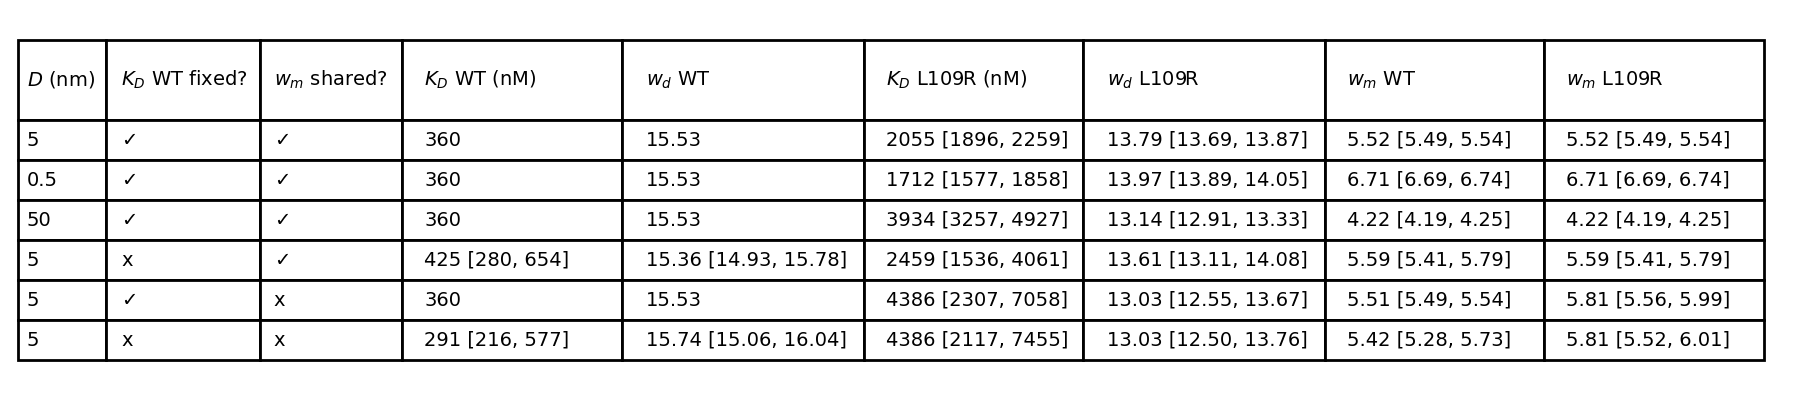

In [11]:
fig = plot_table(res)
fig.savefig('parameters.png', dpi=600, transparent=True)